In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [4]:
df1=pd.DataFrame(PointsInCircum(500,1000))
df2=pd.DataFrame(PointsInCircum(300,700))
df3=pd.DataFrame(PointsInCircum(100,300))
df4=pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
#df4 fpor noise

In [5]:
df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
2295,-229.000000,-504.000000
2296,392.000000,-580.000000
2297,134.000000,525.000000
2298,469.000000,-535.000000


In [6]:
df.to_csv('DBSCAN_DATA.csv',index=False)

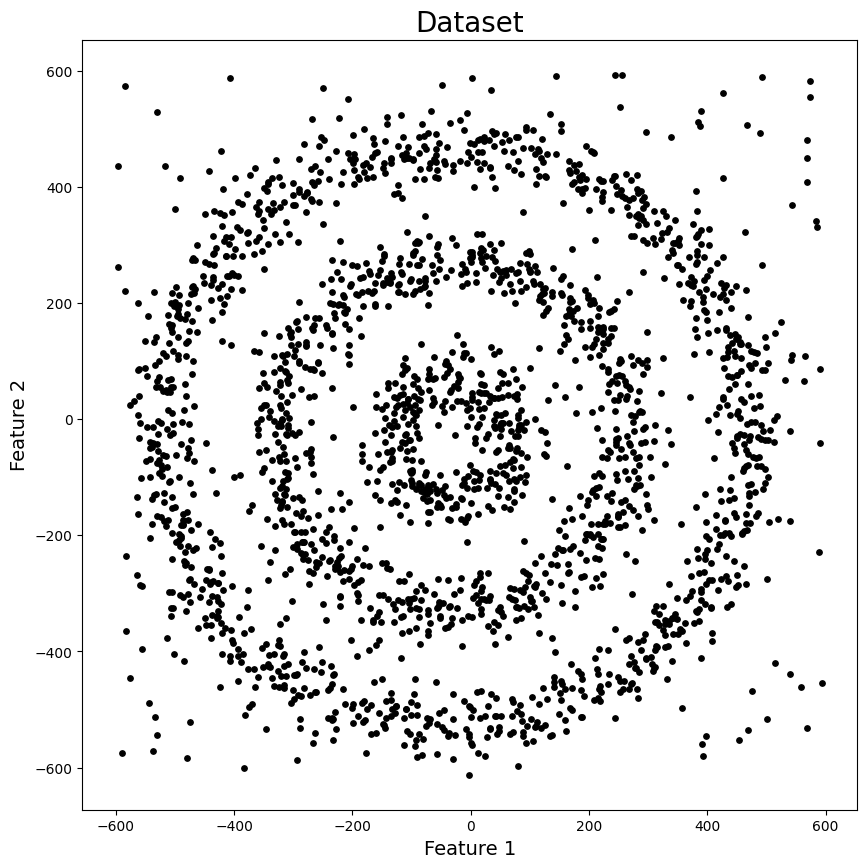

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='black')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K MEANS

In [8]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)

In [9]:
k_means.fit(df[[0,1]])

/home/akshay/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [10]:
df['kmeans_label']=k_means.labels_

In [11]:
df['kmeans_label'].unique()

array([3, 2, 1, 0], dtype=int32)

In [12]:
df['kmeans_label']

0       3
1       3
2       3
3       3
4       3
       ..
2295    1
2296    0
2297    3
2298    0
2299    2
Name: kmeans_label, Length: 2300, dtype: int32

In [13]:
import matplotlib

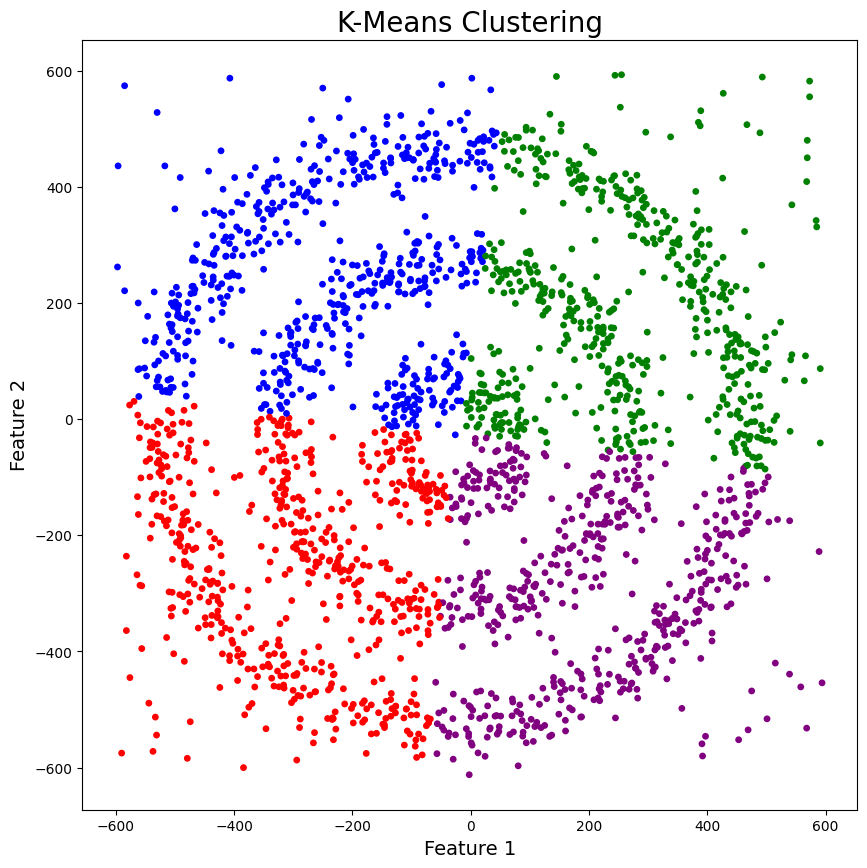

In [14]:
color=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['kmeans_label'],cmap=matplotlib.colors.ListedColormap(color),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Here, K-means failed to cluster the data points into four clusters. Also, it didn’t work well with noise. Therefore, it is time to try another popular clustering algorithm, i.e., Hierarchical Clustering.

# DB SCAN 

In [15]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

Here, epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model:


In [16]:
df['DBSCAN_labels']=dbscan.labels_

In [17]:
df['DBSCAN_labels'].unique()

array([-1])

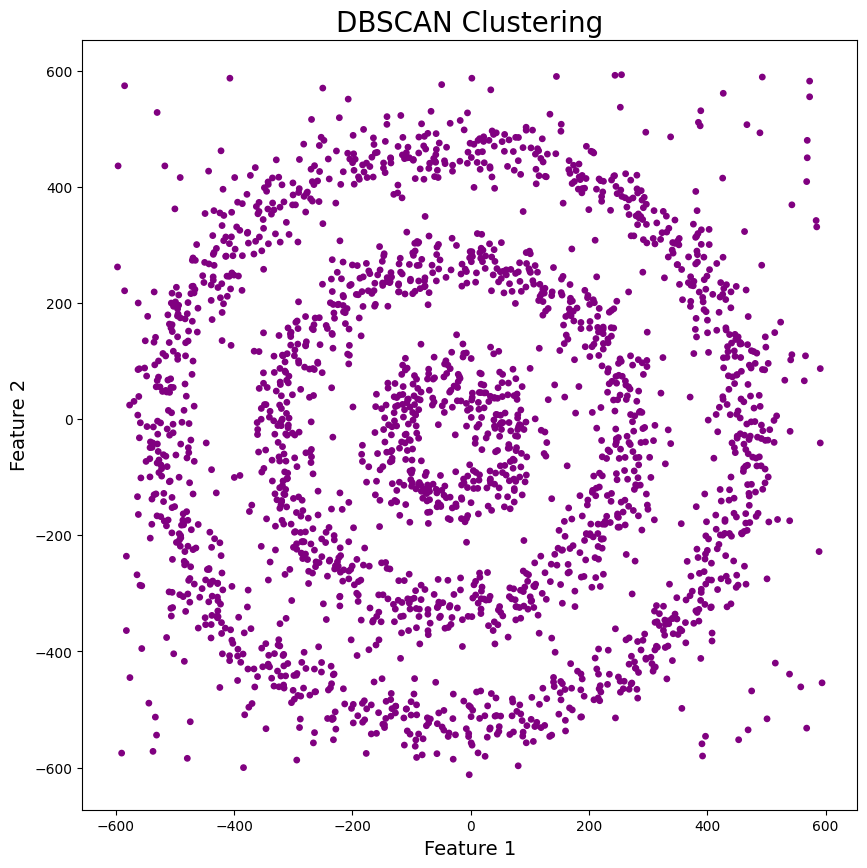

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(color),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Interesting! All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.



# K DISTANCE GRAPH

For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.



In [19]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)

In [20]:
nbrs=neigh.fit(df[[0,1]])

In [21]:
distances,indices=nbrs.kneighbors(df[[0,1]])

In [22]:
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]])

In [23]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# distances

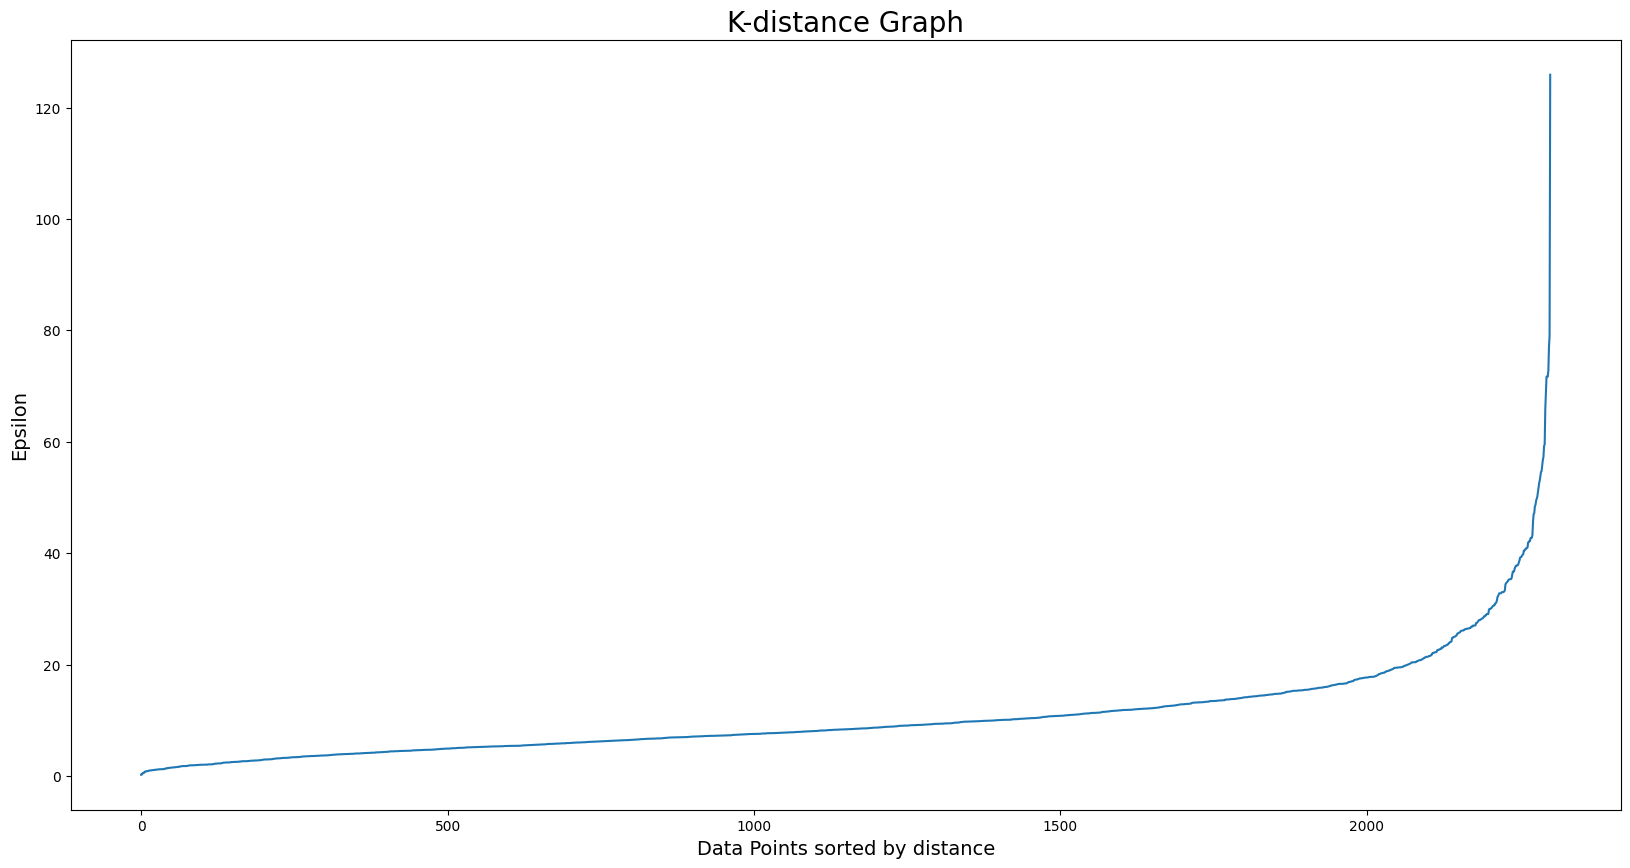

In [24]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:



In [25]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [26]:
df['DBSCAN_OPTIMAL_LABELS']=dbscan_opt.labels_

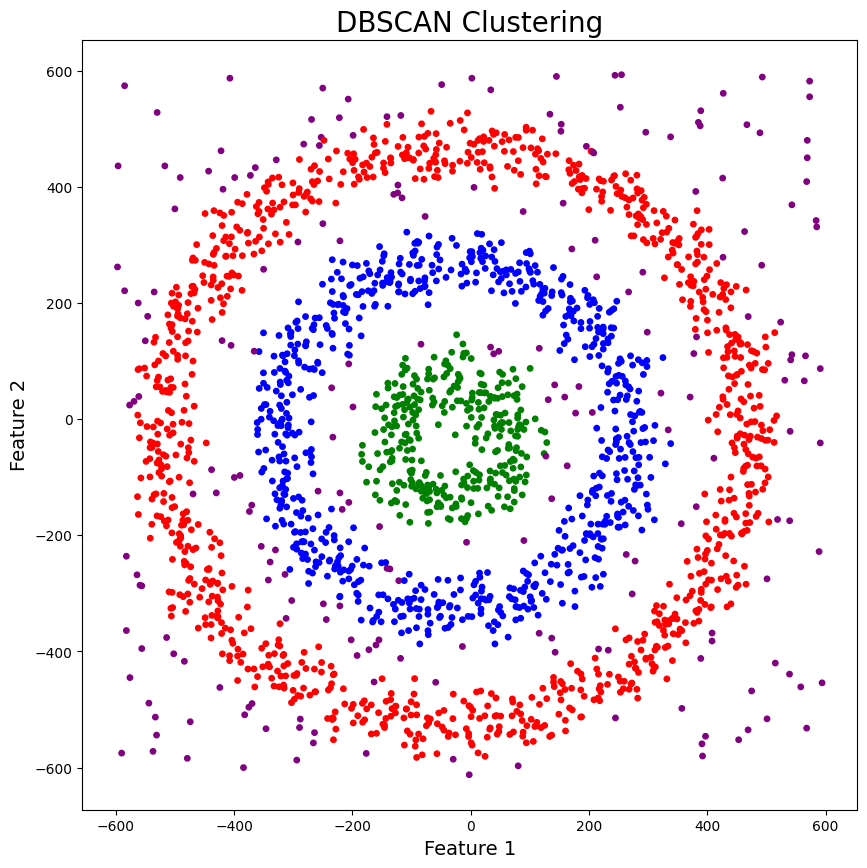

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_OPTIMAL_LABELS'],cmap=matplotlib.colors.ListedColormap(color),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()